In [105]:
import torch
from time import *
import matplotlib.pyplot as plt

In [106]:
cpu = torch.device('cpu')

In [139]:
# class for a state-space model
class StateSpace():
    def __init__(self, A, B, C, D, x, t, integrator):
        self.A = torch.eye(A.size()[1])+t*A
        self.B = B
        self.C = C
        self.D = D
        self.x = x
        self.t = t
        self.Integrator = integrator
        
    def step(self, u):
        return self.Integrator.step(self,u)

In [140]:
# class for an integrator
class ForwardEuler():
    def __init__(self):
        return
    
    def step(model, u):
        x_dot = torch.mm(model.A,model.x)+torch.mm(model.B,u)
        model.x = torch.mm(x_dot,model.t)+model.x
        return torch.mm(model.C,model.x)+torch.mm(model.D,u)

In [141]:
# state-space pendulum model
g = -9.8 #m/s
l = 1 #m
m = 1 #kg

A = [[0,1],[-g/l, 0]]
B = [[0],[l/(m*l**2)]]
C = [[1,0]]
D = [[0]]
x = [[1],[1]]
t = [[0.001]]
u = [[0]]

A = torch.tensor(A,dtype=float,device=cpu)
B = torch.tensor(B,dtype=float,device=cpu)
C = torch.tensor(C,dtype=float,device=cpu)
D = torch.tensor(D,dtype=float,device=cpu)
x = torch.tensor(x,dtype=float,device=cpu)
t = torch.tensor(t,dtype=float,device=cpu)
u = torch.tensor(u,dtype=float,device=cpu)

model = StateSpace(A,B,C,D,x,t,ForwardEuler)

In [148]:
model.step(u)

tensor([[1.0151]], dtype=torch.float64)

runtime: 0.07627511024475098


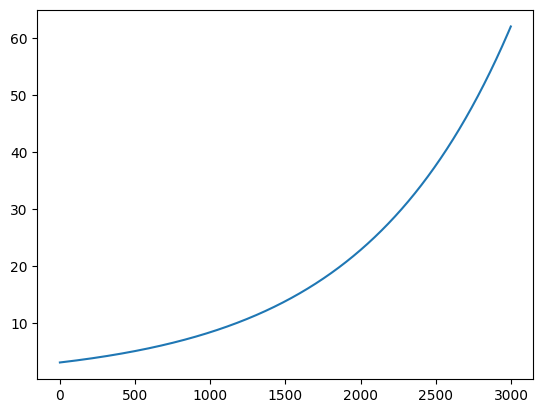

In [152]:
out = []

start=time()
# run simulation
for i in range(3000):
    out.append(model.step(u))
end=time()
plt.plot(out)
print(f"runtime: {end-start}")